# DSC 540 Term Project

## Milestone 5

## November 17th, 2024

### 1. Load datasets into a database.

In [1]:
# Load libraries
import sqlite3
import pandas as pd

In [2]:
# Create database
conn = sqlite3.connect('project_data.db')
cursor = conn.cursor()

In [3]:
# Load data into database
adjusted_spotify_data = pd.read_csv('adjusted_spotify_data.csv')
adjusted_spotify_data.to_sql('Spotify_Data', conn, if_exists='replace', index=False)

adjusted_grammy_data = pd.read_csv('adjusted_grammy_data.csv')
adjusted_grammy_data.to_sql('Grammy_Data', conn, if_exists='replace', index=False)

adjusted_api_data = pd.read_csv('adjusted_api_data.csv')
adjusted_api_data.to_sql('API_Data', conn, if_exists='replace', index=False)

200

In [4]:
# Create a Query to pull all tables from the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
df_tables = pd.read_sql_query(query, conn)

# Display the tables
print(df_tables)

           name
0  Spotify_Data
1   Grammy_Data
2      API_Data


### 2. Join the data into a dataset

In [5]:
# SQL Query to join all data
query = """
SELECT 
    *
FROM 
    Spotify_Data
JOIN 
    API_Data 
ON 
    Spotify_Data.track_name = API_Data.[Track Name]
JOIN 
    Grammy_Data
ON 
    Spotify_Data.track_name = Grammy_Data.Work;
"""

# Execute the query and load the result into a Pandas DataFrame
joined_limited_data = pd.read_sql_query(query, conn)

# Display the joined data
joined_limited_data

,track_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,Album,Release Date,Popularity,Playlist Type,Field,Award,Album,Artist,Work,Winner?
0,Flowers,Miley Cyrus,1,12211,115,1316855716,300,215,745,58,...,Flowers,1/13/2023,23.0,Spotify Playlist,General,Record of the\n Year,None,Miley Cyrus,Flowers,Won
1,Kill Bill,SZA,1,8109,77,1163093654,183,162,161,12,...,SOS,12/8/2022,86.0,Spotify Playlist,General,Record of the Year,None,SZA,Kill Bill,Nominated
2,Last Night,Morgan Wallen,1,2420,19,429829812,52,107,15,1,...,3 Songs At A Time Sampler,1/31/2023,76.0,Spotify Playlist,Country\n & American Roots Music,Best Country Song,None,Morgan Wallen,Last Night,Nominated
3,Rush,Troye Sivan,1,864,78,22581161,71,135,50,1,...,Rush,7/13/2023,26.0,Spotify Playlist,Pop & Dance/Electronic Music,Best Pop Dance\n Recording,None,Troye Sivan,Rush,Nominated
4,Anti-Hero,Taylor Swift,1,9082,56,999748277,242,142,165,9,...,Midnights,10/21/2022,81.0,Spotify Playlist,General,Record of the\n Year,None,Taylor Swift,Anti-Hero,Nominated
5,Baby Don't Hurt Me,"David Guetta, Anne-Marie, Coi Leray",3,4277,66,177740666,145,111,213,11,...,Baby Don't Hurt Me,4/6/2023,81.0,Spotify Playlist,Pop\n & Dance/Electronic Music,Best Pop Dance Recording,None,"David Guetta, Anne-Marie & Coi Leray",Baby Don't Hurt Me,Nominated
6,Karma,Taylor Swift,1,3818,23,404562836,37,55,32,0,...,Midnights,10/21/2022,76.0,Spotify Playlist,Pop & Dance/Electronic Music,Best Pop\n Duo/Group Performance,None,Taylor Swift\n Featuring Ice Spice,Karma,Nominated
7,Fast Car,Luke Combs,1,1446,12,157058870,57,97,35,0,...,Gettin' Old,3/24/2023,82.0,Spotify Playlist,Country\n & American Roots Music,Best Country Solo Performance,None,Luke Combs,Fast Car,Nominated
8,Snooze,SZA,1,2839,25,399686758,58,156,42,1,...,SOS,12/9/2022,85.0,Spotify Playlist,"R&B, Rap & Spoken Word\n Poetry",Best R&B\n Song,None,SZA,Snooze,Won
9,Players,Coi Leray,1,4096,6,335074782,118,48,143,0,...,Players,11/30/2022,68.0,Spotify Playlist,"R&B,\n Rap & Spoken Word Poetry",Best Rap Performance,None,Coi Leray,Players,Nominated


In [6]:
# SQL query to perform two consecutive LEFT JOINs
query = """
SELECT 
    *
FROM 
    Spotify_Data
LEFT JOIN 
    Grammy_Data 
ON 
    Spotify_Data.track_name = Grammy_Data.Work
LEFT JOIN 
    API_Data 
ON 
    Spotify_Data.track_name = API_Data.[Track Name];
"""

# Execute the query and load the result into a Pandas DataFrame
joined_full_data = pd.read_sql_query(query, conn)

# Display the joined data
joined_full_data

,track_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,Artist,Work,Winner?,Track Number,Track Name,Artists,Album,Release Date,Popularity,Playlist Type
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,None,None,None,NaN,None,None,None,None,NaN,None
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,None,None,None,72.0,LALA,Myke Towers,LA VIDA ES UNA,3/23/2023,82.0,Spotify Playlist
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,None,None,None,5.0,vampire,Olivia Rodrigo,vampire,6/30/2023,19.0,Spotify Playlist
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,None,None,None,15.0,Cruel Summer,Taylor Swift,Lover,8/23/2019,89.0,Spotify Playlist
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,None,None,None,NaN,None,None,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37,1,...,None,None,None,NaN,None,None,None,None,NaN,None
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8,0,...,None,None,None,NaN,None,None,None,None,NaN,None
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,...,None,None,None,NaN,None,None,None,None,NaN,None
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,...,None,None,None,NaN,None,None,None,None,NaN,None


### 3. Create 5 Visualizations

In [7]:
# Load libraries
import matplotlib.pyplot as plt

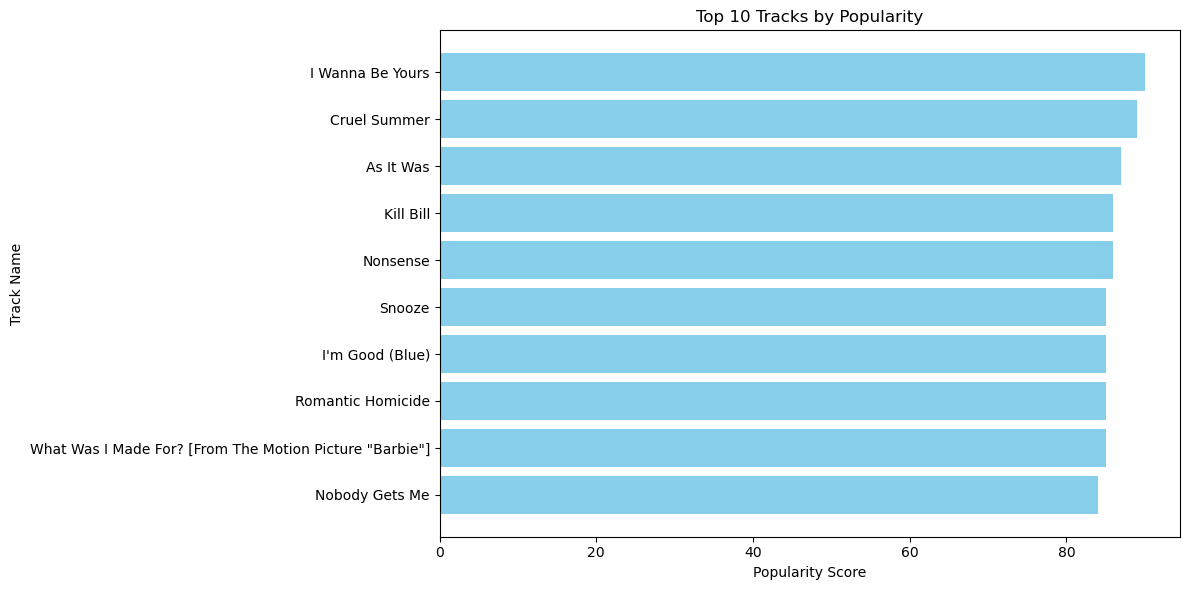

In [8]:
# Extract relevant columns for the visualization
popularity_data_top10 = joined_full_data[['track_name', 'Popularity']]

# Sort data by popularity in descending order and select top 10 tracks
popularity_data_top10 = popularity_data_top10.sort_values(by='Popularity', ascending=False).head(10)

# Create the bar chart for the top 10 tracks
plt.figure(figsize=(12, 6))
plt.barh(popularity_data_top10['track_name'], popularity_data_top10['Popularity'], color='skyblue')
plt.xlabel('Popularity Score')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks by Popularity')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.tight_layout()
plt.show()

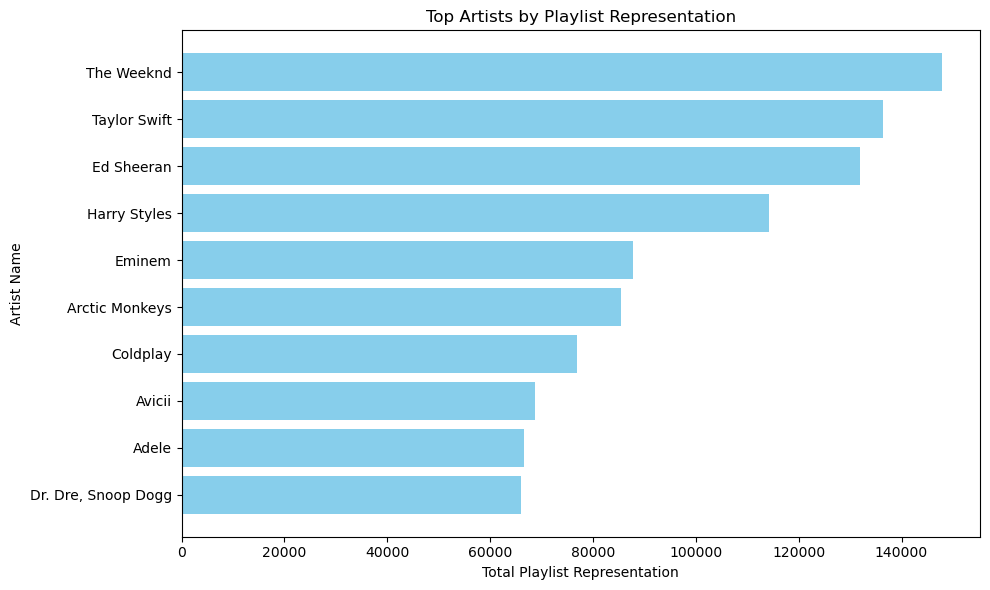

In [9]:
# Ensure the playlist columns are numeric
playlist_columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
for col in playlist_columns:
    joined_full_data[col] = pd.to_numeric(joined_full_data[col], errors='coerce')

# Group by artist_name and calculate total playlist representation
artist_playlist_data = joined_full_data.groupby('artist_name')[playlist_columns].sum()

# Add a column for total playlist representation
artist_playlist_data['total_playlists'] = artist_playlist_data.sum(axis=1)

# Sort artists by total playlist representation in descending order
top_artists = artist_playlist_data.sort_values(by='total_playlists', ascending=False).head(10)

# Create a horizontal bar chart for the top artists
plt.figure(figsize=(10, 6))
plt.barh(top_artists.index, top_artists['total_playlists'], color='skyblue')
plt.xlabel('Total Playlist Representation')
plt.ylabel('Artist Name')
plt.title('Top Artists by Playlist Representation')
plt.gca().invert_yaxis()  # Invert Y-axis to have the highest artist at the top
plt.tight_layout()
plt.show()

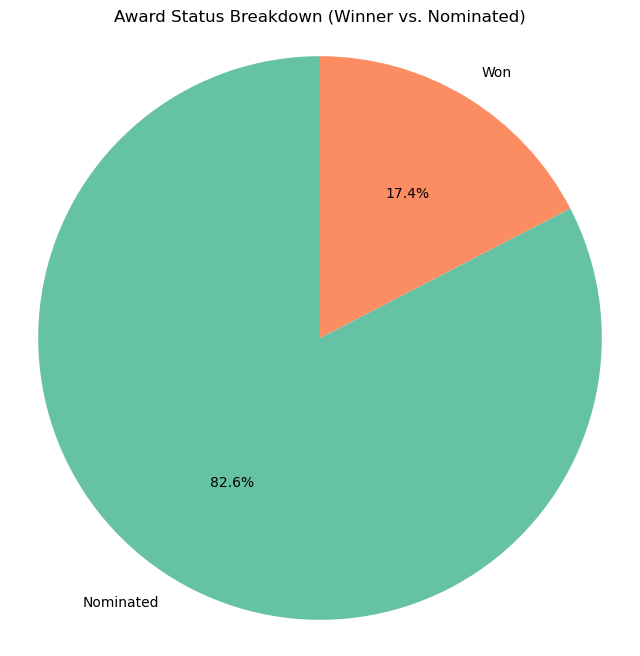

In [10]:
# Check the unique values in the 'Winner?' column to understand the data
award_status = joined_full_data['Winner?'].value_counts()

# Create a pie chart for award status breakdown
plt.figure(figsize=(8, 8))
plt.pie(
    award_status,
    labels=award_status.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66c2a5', '#fc8d62']
)
plt.title('Award Status Breakdown (Winner vs. Nominated)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

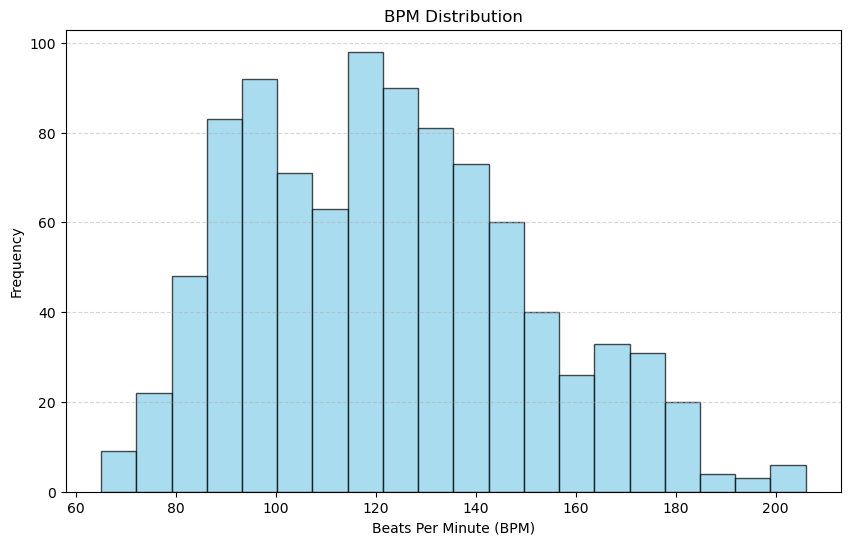

In [11]:
# Extract the 'bpm' column and drop any rows with missing values
bpm_data = joined_full_data['bpm'].dropna()

# Ensure the 'bpm' column is numeric
bpm_data = pd.to_numeric(bpm_data, errors='coerce').dropna()

# Create a histogram to visualize the distribution of bpm
plt.figure(figsize=(10, 6))
plt.hist(bpm_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('BPM Distribution')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

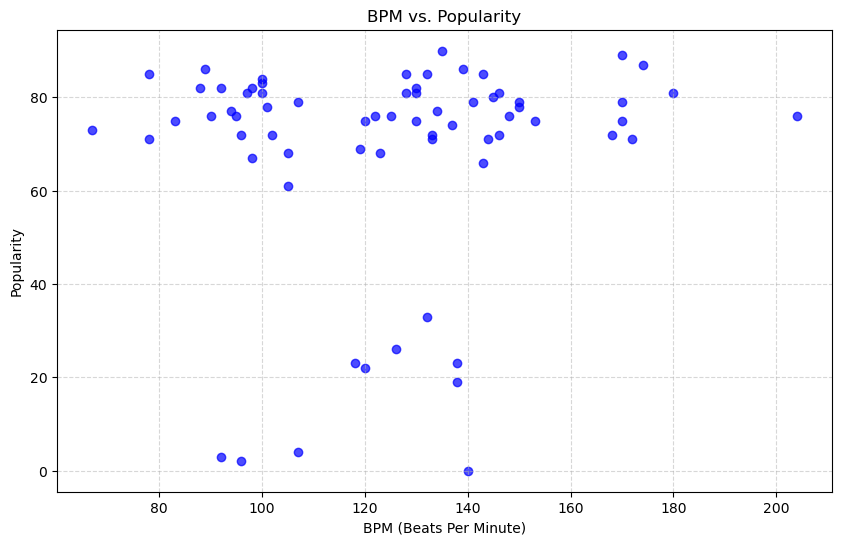

In [12]:
# Scatterplot: BPM vs. Popularity
plt.figure(figsize=(10, 6))
plt.scatter(joined_full_data['bpm'], joined_full_data['Popularity'], alpha=0.7, color='blue')
plt.title('BPM vs. Popularity')
plt.xlabel('BPM (Beats Per Minute)')
plt.ylabel('Popularity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In the above code, I first created a database called project_data within the SQLite system. I then loaded the csv files that I created from the other 3 milestones into the database and created a query to pull all the tables from the database to ensure the csv files were loaded correctly.

For my project, I focused on using Song Title as a primary key across all three datasets so that all three sets can be merged together with their information. As a reminder, the first dataset is from kaggle pulling the top songs of 2023. The second dataset was from the Grammy awards website and has information regarding awards for Songs and Artists in 2023. The final dataset is a set from the Spotify API that pulled the top 100 Songs of 2023 in terms of Spotify streams and has detailed information regarding the musicality of each song. 

Based on all of the information from these datasets, I joined the data in two different ways using SQL. The first way performs an inner join, joining only the rows that have information across all three datasets. Across all three sets I had over 1100 rows of data and after joining the information, I only had 13 Song Titles that had information across all three sets. Because of this, I also performed a left join using the Kaggle set as the standard, and then added in the information from the grammy awards and spotify API. This left me with the over 900 rows of information and information as necessary from the other two sources.

One thing that I learned from this project, is that early on, I should've been more mindful of how primary keys work and how these datasets would actually combine by the end. If I better understood how the Primary Keys worked regarding connecting the data, I think I would have shifted my focus for this project more towards gathering information that would support each dataset because now I am left with a lot more null values due to have different song titles across each dataset. The credibility of the above charts is less due to not having complete information from the data that I pulled.

Ethical implications have been a topic of importance throughout each milestone. I pulled my data from Kaggle: a reputable data website, the Grammy awards official website, and the Spotify API. The first two sources I believe are completely reputable and ethical to pull data from. The only concern I'd have regarding ethics revolves around the Spotify API as this tool has the ability to pull information from individual users. My focus for this project pulled Playlist information from the official Spotify account so I believe it is reputable and doesn't cause any ethical implications. 

The second half of this portion of the project involved creating 5 visualizations about the data. I first created a bar chart pulling Track_Title from the Kaggle set and Popularity from the Spotify API and displayed the Top 10 Tracks based on Popularity. The second visual looked at Artists from the Kaggle information and ranked the artists based on their Playlist Representation Statistics from the Spotify API. Next I looked at all the tracks from the Kaggle information and created a pie chart representing of those songs that were nominated for a Grammy, how many won. The data shows that 17.4% of the songs from the Kaggle information that were nominated for a Grammy won the award. Fourth, I looked at the distribution of BPM in each song in the dataset. I found that 120 was the most common BPM for a given song with a somewhat normal distribution of the data. Finally, I further looked at BPM from the Spotify API and compared it to the Popularity of a song within the Spotify API to see if there was any correlation. Based on the Scatterplot, I do not see one.

Overall, I beleive that this project served as a great catch all of all of the information that was presented in this course. I learned how to clean Excel data, HTML data, and use API's. I also learned how to use SQL and create databases and queries to pull specific details about the information. Finally, I learned how to present data in visual formats such as bar charts, pie charts, and scatterplots just to name a few. If I could complete this project again and enhance it, I would focus more on the idea of primary and foreign keys so that I had detailed information across the board to be able to further analyze song trends in the music industry.